## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [1]:
# load data
import pandas as pd
data = pd.read_csv(r'sales_data.csv', parse_dates=['date'])
data.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

In [2]:
# What are the total sales for each payment method?
group = data.groupby('payment')['total'].sum()
group

payment
Cash            19199.10
Credit card    110271.57
Transfer       159642.33
Name: total, dtype: float64

In [3]:
# data visualization
import matplotlib.pyplot as plt

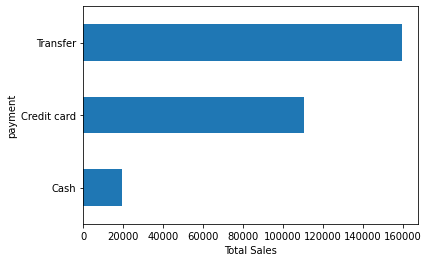

In [4]:
# Lets visualize
group.plot(kind='barh')
plt.xlabel('Total Sales')
plt.show()

In [5]:
# % Transfer
print('% Transfer : ', str(159642.33 / sum(data.groupby('payment')['total'].sum())*100))

% Transfer :  55.2179701362443


In [6]:
# % Cash
print('% Cash : ', str(19199.10 / sum(data.groupby('payment')['total'].sum())*100))

% Cash :  6.640690664203961


**55.21%** of Sales done through **Transfer-Payment** method.

Only **6.64%** Sales by **Cash-Payment** method

In [7]:
# What is the average unit price for each product line?
group = data.groupby('product_line')['unit_price'].mean()
group

product_line
Breaking system          17.740522
Electrical system        25.585130
Engine                   60.091803
Frame & body             42.832229
Miscellaneous            22.810738
Suspension & traction    33.969868
Name: unit_price, dtype: float64

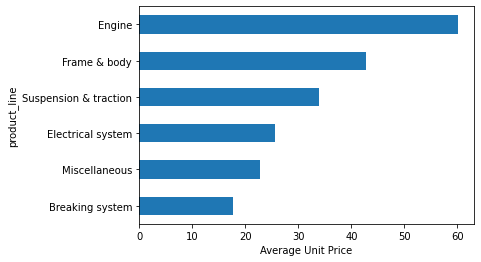

In [8]:
# lets visualize
group.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Average Unit Price')
plt.show()

In [9]:
data_frame = pd.DataFrame(data.groupby('product_line')['unit_price'].mean().sort_values(ascending=False))
data_frame

,unit_price
product_line,
Engine,60.091803
Frame & body,42.832229
Suspension & traction,33.969868
Electrical system,25.585130
Miscellaneous,22.810738
Breaking system,17.740522


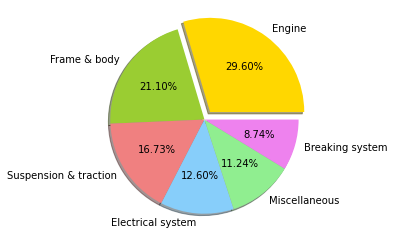

In [10]:
# pie chart
labels = data_frame.index
sizes = group.sort_values(ascending=False)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'violet']
explode = (0.1, 0, 0, 0, 0, 0)

# plot
plt.pie(sizes, explode=explode,
       labels=labels, colors=colors,
       autopct='%1.2f%%', shadow=True)
plt.axis('equal')
plt.show()

**Engine** Product Line have the highest average unit price.

**Breaking System** Product Line have the lowest average unit price.

In [11]:
# average purchase value by client type
group = data.groupby('client_type')['total'].mean()
group

client_type
Retail       167.058929
Wholesale    709.521467
Name: total, dtype: float64

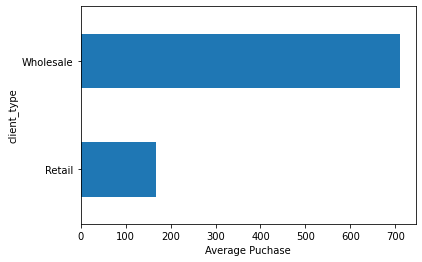

In [12]:
# lets visualize
group.plot(kind='barh', )
plt.xlabel('Average Puchase')
plt.show()

In [13]:
data_frame = pd.DataFrame(group.sort_values(ascending=False))
total = sum(group)
percent = []

for i in range(group.shape[0]):
    pct = (data_frame.iloc[i,0] / total) * 100
    percent.append(round(pct, 2))
    
# percent
print(percent)

# display data
group['percent'] = percent
display(group)

[80.94, 19.06]


client_type
Retail           167.058929
Wholesale        709.521467
percent      [80.94, 19.06]
Name: total, dtype: object

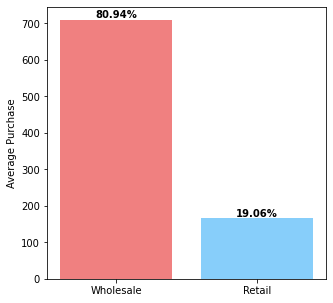

In [14]:
# depict illustration
plt.figure(figsize=(5, 5))
colors_list = ['lightcoral', 'lightskyblue']
graph = plt.bar(data_frame.index,data_frame.total, color=colors_list)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(group.percent[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.ylabel('Average Purchase')
plt.show()

**80.94%** of purchase is done by **Wholesale**

only **19.06%** of purchase os done by **Retail**